In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(train_images.shape) #В обучающем наборе имеется 60 000 изображений, каждое изображение представлено как 28 x 28 пикселей

print(test_images.shape) #В тестовом наборе имеется 10 000 изображений, каждое изображение представлено как 28 x 28 пикселей

print(len(train_labels)) #В учебном наборе 60 000 меток

print(len(test_labels)) #В тестовом наборе 10 000 меток

train_labels #Каждая метка представляет собой целое число от 0 до 9 (Показывается первые 3 метки и последние 3 метки)

(60000, 28, 28)
(10000, 28, 28)
60000
10000


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

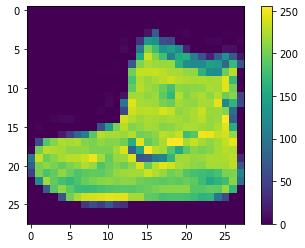

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

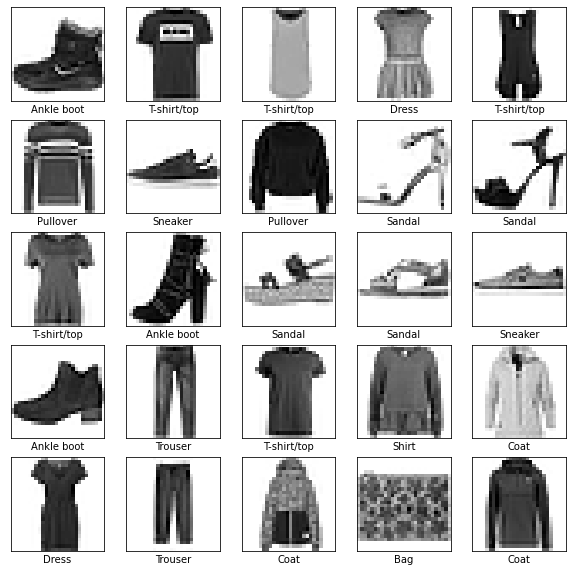

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.6354 - accuracy: 0.7773
Epoch 2/5
1875/1875 [==============================] - 2s 800us/step - loss: 0.3942 - accuracy: 0.8588
Epoch 3/5
1875/1875 [==============================] - 2s 885us/step - loss: 0.3452 - accuracy: 0.8741
Epoch 4/5
1875/1875 [==============================] - 2s 809us/step - loss: 0.3161 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 2s 846us/step - loss: 0.2942 - accuracy: 0.8902


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 593us/step - loss: 0.3588 - accuracy: 0.8724
Test accuracy: 0.8723999857902527


In [12]:
predictions = model.predict(test_images) # получаем предсказания модели

In [13]:
predictions[0] # смотрим предсказание по 0-му элементу

array([2.6971114e-05, 5.1990288e-08, 9.1275609e-07, 2.0795221e-07,
       7.4889181e-07, 3.9653994e-02, 4.5178431e-06, 9.4900176e-02,
       2.0741370e-05, 8.6539173e-01], dtype=float32)

In [14]:
np.argmax(predictions[0])# получаем класс, который модель для этого элемента

9

In [15]:
test_labels[0] # сравниваем с фактическим классом, сошлось.

9

In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

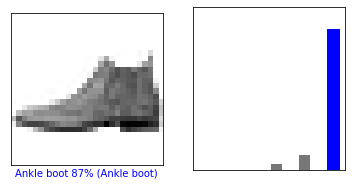

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

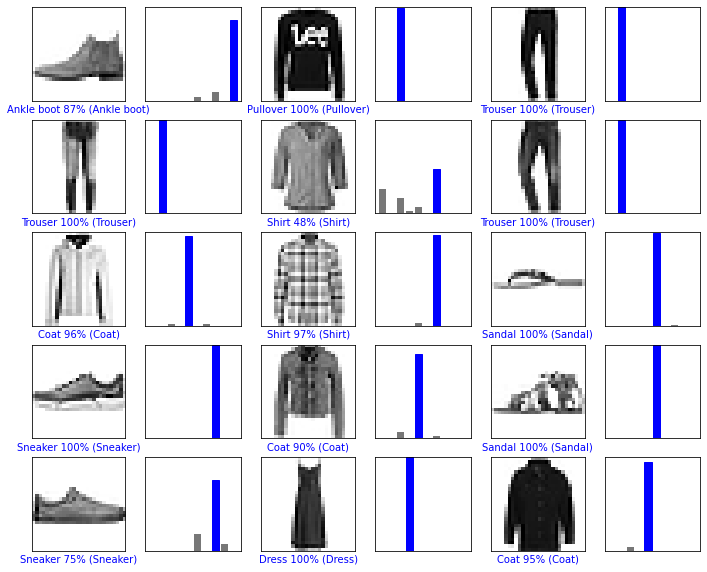

In [18]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [19]:
img = test_images[0]

In [20]:
img = (np.expand_dims(img, 0))

In [21]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.6971136e-05 5.1990281e-08 9.1275598e-07 2.0795278e-07 7.4889169e-07
  3.9654024e-02 4.5178472e-06 9.4900258e-02 2.0741367e-05 8.6539161e-01]]


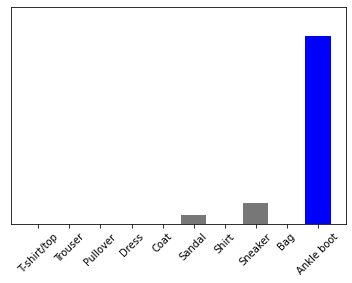

In [22]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [23]:
np.argmax(predictions_single[0])

9